In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.preprocessing import image
import warnings

In [34]:
# Set display options
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.width', None)
warnings.filterwarnings("ignore")

In [35]:
# Data preprocessing
train_data_generator = ImageDataGenerator(rescale=1.0/255,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True,
                                         vertical_flip=True,
                                         rotation_range=20,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2)

In [36]:
train_generator = train_data_generator.flow_from_directory('C:/Users/vaish/Downloads/Cotton Disease Prediction/train',
                                                           target_size=(128, 128),
                                                           batch_size=32,
                                                           class_mode='categorical',
                                                           seed=42,
                                                           shuffle=True)

Found 1951 images belonging to 4 classes.


In [37]:
valid_data_generator = ImageDataGenerator(rescale=1.0/255)
valid_generator = valid_data_generator.flow_from_directory('C:/Users/vaish/Downloads/Cotton Disease Prediction/val',
                                                           target_size=(128, 128),
                                                           batch_size=32,
                                                           class_mode='categorical',
                                                           seed=42,
                                                           shuffle=True)

Found 253 images belonging to 4 classes.


In [38]:
test_data_generator = ImageDataGenerator(rescale=1.0/255)
test_generator = test_data_generator.flow_from_directory('C:/Users/vaish/Downloads/Cotton Disease Prediction/test',
                                                         target_size=(128, 128),
                                                         batch_size=32,
                                                         class_mode='categorical',
                                                         seed=42,
                                                         shuffle=False)

Found 106 images belonging to 4 classes.


In [39]:
# Build the CNN
cnn = Sequential()
cnn.add(Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', input_shape=[128, 128, 3]))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(rate=0.25))
cnn.add(Conv2D(filters=32, padding='same', kernel_size=3, activation='relu'))
cnn.add(Conv2D(filters=64, padding='same', kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(rate=0.25))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dropout(rate=0.25))
cnn.add(Dense(units=4, activation='softmax'))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                  

In [40]:
# Train the CNN
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn.fit(train_generator, validation_data=valid_generator, epochs=20)

Epoch 1/20
61/61 [==============================] - 37s 541ms/step - loss: 1.2810 - accuracy: 0.4100 - val_loss: 1.1525 - val_accuracy: 0.5020
Epoch 2/20
61/61 [==============================] - 35s 580ms/step - loss: 1.0865 - accuracy: 0.5249 - val_loss: 0.9965 - val_accuracy: 0.5731
Epoch 3/20
61/61 [==============================] - 36s 587ms/step - loss: 0.9978 - accuracy: 0.5736 - val_loss: 1.1271 - val_accuracy: 0.4585
Epoch 4/20
61/61 [==============================] - 33s 540ms/step - loss: 0.9452 - accuracy: 0.6115 - val_loss: 0.7907 - val_accuracy: 0.7154
Epoch 5/20
61/61 [==============================] - 36s 590ms/step - loss: 0.8069 - accuracy: 0.6827 - val_loss: 0.7227 - val_accuracy: 0.7036
Epoch 6/20
61/61 [==============================] - 32s 521ms/step - loss: 0.7353 - accuracy: 0.7119 - val_loss: 0.6428 - val_accuracy: 0.7549
Epoch 7/20
61/61 [==============================] - 31s 507ms/step - loss: 0.6348 - accuracy: 0.7453 - val_loss: 0.4979 - val_accuracy: 0.8142

In [41]:
# Visualize training history
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

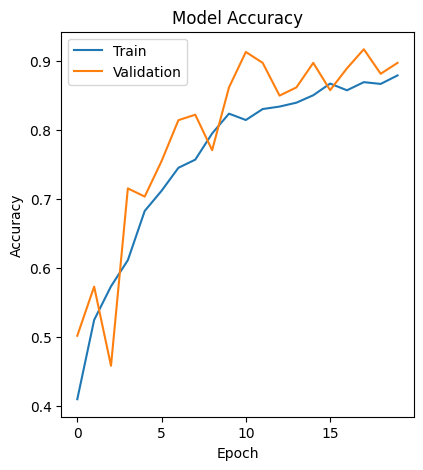

In [42]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

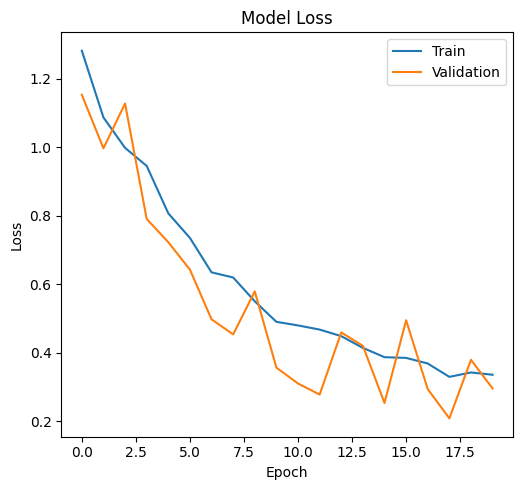

In [43]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [44]:
# Evaluate on the validation set
cnn.evaluate(valid_generator)

8/8 [==============================] - 2s 214ms/step - loss: 0.2963 - accuracy: 0.8972


[0.2963380515575409, 0.8972331881523132]

In [47]:
# Predict on test images
test_image_paths = ['C:/Users/vaish/Downloads/Cotton Disease Prediction/test/fresh cotton leaf/d (133)_iaip.jpg', 'C:/Users/vaish/Downloads/Cotton Disease Prediction/test/fresh cotton leaf/d (133)_iaip.jpg', 'C:/Users/vaish/Downloads/Cotton Disease Prediction/test/diseased cotton plant/dd (885)_iaip.jpg']
pred_labels = []

for path in test_image_paths:
    test_image = image.load_img(path, target_size=(128, 128))
    test_image = image.img_to_array(test_image) / 255.0
    test_image = np.expand_dims(test_image, axis=0)
    result = cnn.predict(test_image)
    pred_labels.append(result.argmax())

print("Predicted Labels:", pred_labels)

1/1 [==============================] - 0s 47ms/step
Predicted Labels: [2, 2, 1]


In [48]:
# Predict on the entire test set
test_generator.reset()
predictions = cnn.predict(test_generator, verbose=1)

4/4 [==============================] - 3s 872ms/step
